# Pymaceuticals Inc.
---

### Analysis

- After analyzing the data in the following graphs, a couple of conclusions can be made. First, according to the pie chart section, the test subjects were almost 50/50 on male mice vs female mice. From this conclusion the study should not be affected on the sex of the mice since there were studied evenly on both sexes. Next, it seems that the drugs "Capomulin" and "Ramicane" had the most success with tumor shrinkage compared to the other drugs. In the dataframe and following boxplot graph in the "Outliers, Quartiles, and Boxplots" sections, these drugs preformed the best. For example in the final timepoint for the mice the tumor size for the placebo mice range from '65 to 72 (mm3)', while 'Infubinol' final tumor size ranges from '57 to 67 (mm3)', "Ceftamin" comes in a little better with ranges from '45 to 62 (mm3)' and finally "Ramicane" final tumor sizes range from '32 to 38 (mm3)' and "Capomulin" ranges from '28 to 38 (mm3)'. Capomulin and Ramicane's final tumor size is almost half the size of the competition drugs. Lastly, a fair conclusion to take from these data visuals is in the final visuals, scatterplots and correlations, the more the mice weigh the bigger the tumors are. You can see in the final visual the linregress model fits into the correlation.

In [346]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
df = pd.DataFrame(mouse_data_complete)
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [347]:
# Checking the number of mice.
num_mice = mouse_data_complete["Mouse ID"].nunique()
num_mice

249

In [348]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ids = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]['Mouse ID']
duplicate_ids_array = duplicate_ids.unique()
duplicate_ids_array



array(['g989'], dtype=object)

In [349]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_ids_array)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [367]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [366]:
# Checking the number of mice in the clean DataFrame.
unique_mice_ids_cleaned = cleaned_df['Mouse ID'].nunique()
print(unique_mice_ids_cleaned)

249


## Summary Statistics

In [352]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_regimen = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_stats = pd.DataFrame({
    'Mean': grouped_regimen.mean(),
    'Median': grouped_regimen.median(),
    'Variance': grouped_regimen.var(),
    'Standard Deviation': grouped_regimen.std(),
    'SEM': grouped_regimen.sem()
})
summary_stats_renamed = summary_stats.rename(columns={"Mean":"Mean Tumor Volume", "Median": "Median Tumor Volume",\
                                                       "Variance": "Tumor Volume Variance", "Standard Deviation": "Tumor Volume Std. Dev.",\
                                                          "SEM": "Tumor Volume Std. Err"})
summary_stats_renamed

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [353]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

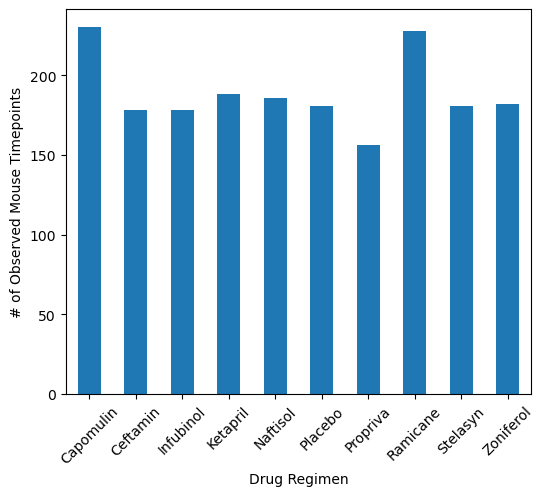

In [354]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_data = cleaned_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].count().reset_index()
timepoints_per_regimen = grouped_data.groupby('Drug Regimen')['Timepoint'].sum()
timepoints_per_regimen.plot(kind='bar', figsize=(6, 5), rot=45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


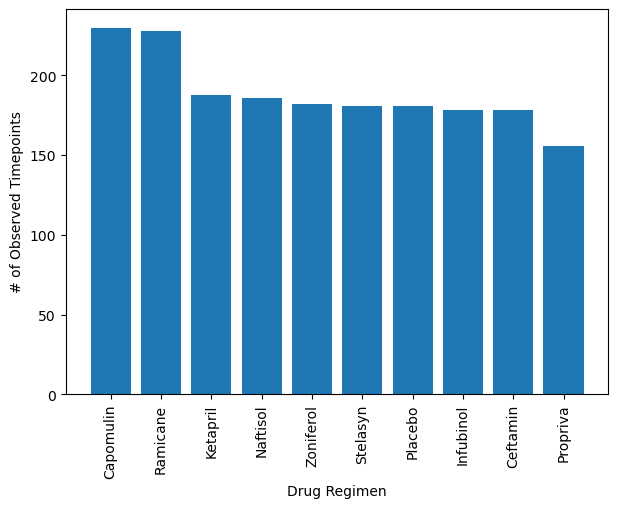

In [355]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_df["Drug Regimen"].value_counts()
plt.figure(figsize=(7, 5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation=90)
plt.show()

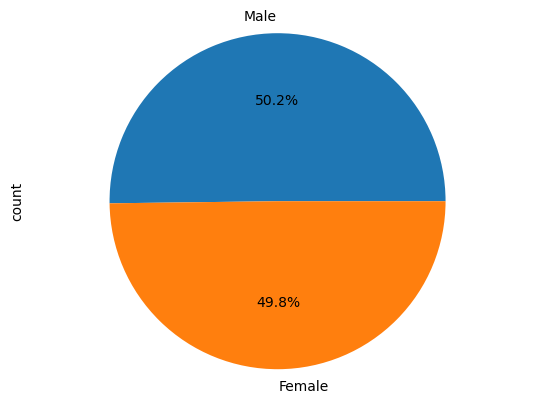

In [356]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset=['Mouse ID'])

# Create the pie chart
gender_distribution = unique_mice['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(p))
plt.axis('equal') 
plt.show()

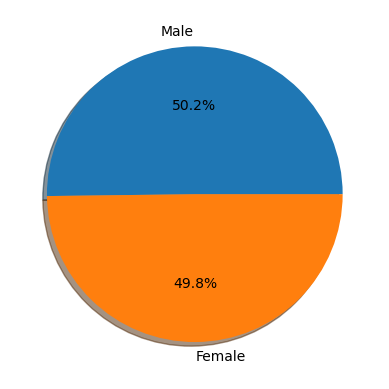

In [357]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = unique_mice['Sex'].value_counts()
labels = ["Male", "Female"]
plt.pie(gender_distribution, labels=labels, autopct="%1.1f%%", shadow=True,)
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [364]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoints = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Last_Tumor_Vol = pd.merge(mouse_timepoints, mouse_data_complete, on=["Mouse ID", "Timepoint"])
Last_Tumor_Vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [359]:
# Put treatments into a list for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Iterate over each treatment to calculate potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = Last_Tumor_Vol.loc[Last_Tumor_Vol["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset to the tumor_volume_data list
    tumor_volume_data.append(final_tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Filter for potential outliers for the current treatment
    potential_outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    
    # Print potential outliers for the current treatment
    print(f"{treatment}'s potential outliers: {potential_outliers}")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


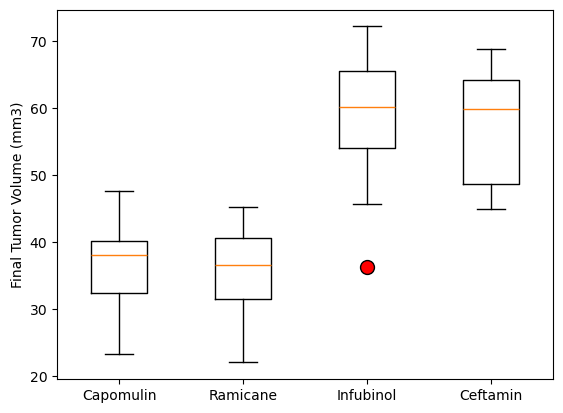

In [360]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_data, flierprops=dict(marker='o', markerfacecolor='r', markersize=10))


ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

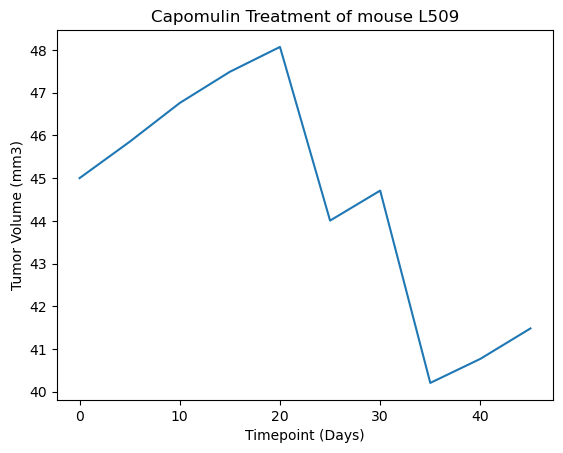

In [361]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Choose a specific mouse ID
selected_mouse_id = 'l509'

# Filter the data further for the selected mouse ID
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]
selected_mouse_data

# Plot mouse data 
x_axis = selected_mouse_data["Timepoint"]
y_axis = selected_mouse_data["Tumor Volume (mm3)"]
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse L509")
plt.plot(x_axis, y_axis)
plt.show()

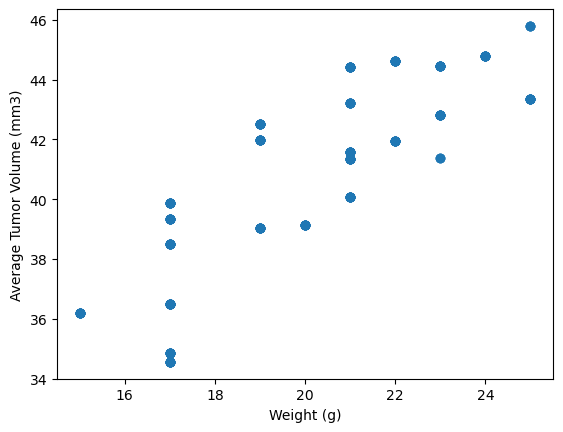

In [362]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
merged_data = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")
weight = merged_data['Weight (g)']
average_tumor_volume = merged_data['Tumor Volume (mm3)_y']

# Plot the scatter plot
plt.scatter(weight, average_tumor_volume, marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.83


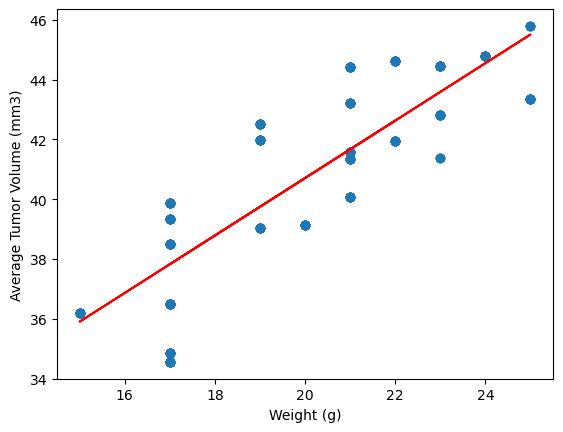

In [363]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(weight, average_tumor_volume)
rounded_correlation = round(correlation_coefficient, 2)
print(f"The correlation between mouse weight and the average tumor volume is: {rounded_correlation}")

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(weight, average_tumor_volume)

# Print the linear regression equation
plt.scatter(weight, average_tumor_volume, marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight, slope * weight + intercept, color='red', label='Linear Regression Line')

plt.show()